The Dataset we will be analysing is the Glassdoor's Job Market Report. We will be looking for 5 months of data ie from May 2019 to September-2019. 
The Datasets can be downloaded from below link: 
https://www.glassdoor.com/research/data-sets/job-market-report-historical/.
Download the following files: September 2019, August 2019,July 2019,June 2019 and May 2019.

Keep the downloaded file in the same folder where your Jupyter notebook is stored.<br>
Hypothesis coverd:
1.  Which is the highest paying job in the last 5 months.

2. What is the highest paid job in each metro.

3. Which one is more, Technology Jobs or Non-Technology jobs?

4. Which metro gives the highest paid Data Science Job. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sept=pd.read_excel('JMR_data-2019-09.xlsx')
aug=pd.read_excel('JMR_data-2019-08.xlsx')
july=pd.read_excel('JMR_data-2019-07.xlsx')
june=pd.read_excel('JMR_data-2019-06.xlsx')
may=pd.read_excel('JMR_data-2019-05.xlsx')

As we can see we have loaded the 5 months of data from month of may to september. Now lets explore the data.

In [3]:
sept.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2019-09,U.S. Job Openings,U.S. Job Openings,"5,960,400",3.5%
1,National,Quick Facts,2019-09,U.S. Median Pay,U.S. Median Pay,"$ 54,179",2.1%
2,Atlanta,Quick Facts,2019-09,Metro Job Openings,Metro Job Openings,"122,889",5.5%
3,Atlanta,Quick Facts,2019-09,U.S. Job Openings,U.S. Job Openings,"5,960,400",3.5%
4,Atlanta,Quick Facts,2019-09,Metro Median Pay,Metro Median Pay,"$ 56,059",3.0%


In [4]:
sept.shape

(4794, 7)

Lets check that we have same columns in every dataframe.

In [5]:
print(sept.columns)
print(aug.columns)
print(july.columns)
print(june.columns)
print(may.columns)

Index(['Metro', 'Dimension Type', 'Month', 'Dimension', 'Measure', 'Value',
       'YoY'],
      dtype='object')
Index(['Metro', 'Dimension Type', 'Month', 'Dimension', 'Measure', 'Value',
       'YoY'],
      dtype='object')
Index(['Metro', 'Dimension Type', 'Month', 'Dimension', 'Measure', 'Value',
       'YoY'],
      dtype='object')
Index(['Metro', 'Dimension Type', 'Month', 'Dimension', 'Measure', 'Value',
       'YoY'],
      dtype='object')
Index(['Metro', 'Dimension Type', 'Month', 'Dimension', 'Measure', 'Value',
       'YoY'],
      dtype='object')


Lets check all the unique value of the columns for a dataframe.

Cheking all the metro

In [6]:
sept['Metro'].unique()

array(['National', 'Atlanta', 'New York City', 'Los Angeles',
       'Philadelphia', 'Houston', 'Seattle', 'San Francisco', 'Chicago',
       'Boston', 'Washington DC', 'U.S.'], dtype=object)

Before checking 'Dimension Type' lets rename it to 'Dimension_Type'

In [7]:
sept.rename(columns={'Dimension Type':'Dimension_Type'}, inplace=True)
aug.rename(columns={'Dimension Type':'Dimension_Type'}, inplace=True)
july.rename(columns={'Dimension Type':'Dimension_Type'}, inplace=True)
june.rename(columns={'Dimension Type':'Dimension_Type'}, inplace=True)
may.rename(columns={'Dimension Type':'Dimension_Type'}, inplace=True)

For each metro we have 5 dimension type assigned

In [8]:
sept['Dimension_Type'].unique()

array(['Quick Facts', 'Job Title', 'Company Size', 'Industry',
       'Timeseries'], dtype=object)

We have lots of dimension defined for the data, mainly in consist of job categories

In [9]:
sept['Dimension'].unique()

array(['U.S. Job Openings', 'U.S. Median Pay', 'Metro Job Openings',
       'Metro Median Pay', 'Accountant', 'Administrative Assistant',
       'Attorney', 'Bank Teller', 'Barista', 'Bartender',
       'Business Analyst', 'Business Development Manager', 'Buyer',
       'Cashier', 'Certified Nursing Assistant', 'Civil Engineer',
       'Claims Adjuster', 'Communications Manager',
       'Construction Laborer', 'Consultant', 'Customer Service Manager',
       'Customer Service Representative', 'Data Analyst',
       'Data Scientist', 'Delivery Driver', 'Design Engineer',
       'Electrical Engineer', 'Emergency Medical Technician',
       'Field Engineer', 'Financial Advisor', 'Financial Analyst',
       'Graphic Designer', 'Human Resources Manager', 'Insurance Agent',
       'IT Manager', 'Java Developer', 'Licensed Practical Nurse',
       'Loan Officer', 'Machine Operator', 'Maintenance Technician',
       'Maintenance Worker', 'Manufacturing Engineer',
       'Marketing Manager', 'M

The measure column deals with the job opening, and the Pay

In [10]:
sept['Measure'].unique()

array(['U.S. Job Openings', 'U.S. Median Pay', 'Metro Job Openings',
       'Metro Median Pay', 'Median Base Pay', 'Job Openings'],
      dtype=object)

#### The data sets are very meesy and to fetch something out of them we have to divide them into sub categories.

#### Seprating the dataset based on the 'Dimension_Type' column, for each month.

In [11]:
quick_facts_sept = sept[sept['Dimension_Type'] == 'Quick Facts']
job_title_sept = sept[sept['Dimension_Type'] == 'Job Title']
company_size_sept = sept[sept['Dimension_Type'] == 'Company Size']
industry_sept = sept[sept['Dimension_Type'] == 'Industry']
timeserie_sept = sept[sept['Dimension_Type'] == 'Timeseries']

In [12]:
quick_facts_aug = aug[aug['Dimension_Type'] == 'Quick Facts']
job_title_aug = aug[aug['Dimension_Type'] == 'Job Title']
company_size_aug = aug[aug['Dimension_Type'] == 'Company Size']
industry_aug = aug[aug['Dimension_Type'] == 'Industry']
timeserie_aug = aug[aug['Dimension_Type'] == 'Timeseries']

In [13]:
quick_facts_july = july[july['Dimension_Type'] == 'Quick Facts']
job_title_july = july[july['Dimension_Type'] == 'Job Title']
company_size_july = july[july['Dimension_Type'] == 'Company Size']
industry_july = july[july['Dimension_Type'] == 'Industry']
timeserie_july = july[july['Dimension_Type'] == 'Timeseries']

In [14]:
quick_facts_june = june[june['Dimension_Type'] == 'Quick Facts']
job_title_june = june[june['Dimension_Type'] == 'Job Title']
company_size_june = june[june['Dimension_Type'] == 'Company Size']
industry_june = june[june['Dimension_Type'] == 'Industry']
timeserie_june = june[june['Dimension_Type'] == 'Timeseries']

In [15]:
quick_facts_may = may[may['Dimension_Type'] == 'Quick Facts']
job_title_may = may[may['Dimension_Type'] == 'Job Title']
company_size_may = may[may['Dimension_Type'] == 'Company Size']
industry_may = may[may['Dimension_Type'] == 'Industry']
timeserie_may = may[may['Dimension_Type'] == 'Timeseries']

#### Now we got the dataset seprated based on Dimension_Type column for each month.<br>
#### for all the months combining the dataset of similar kind.

In [16]:
quick_fact_frames=[quick_facts_sept, quick_facts_aug, quick_facts_july, quick_facts_june, quick_facts_may]
job_title_frames=[job_title_sept, job_title_aug, job_title_july, job_title_june, job_title_may]
company_size_frames=[company_size_sept, company_size_aug, company_size_july, company_size_june, company_size_may]
industry_frames=[industry_sept, industry_aug, industry_july, industry_june, industry_may]
timeseries_frames=[timeserie_sept, timeserie_aug, timeserie_july, timeserie_june, timeserie_may]

In [17]:
quick_fact=pd.concat(quick_fact_frames)
job_title=pd.concat(job_title_frames)
company_size=pd.concat(company_size_frames)
industry=pd.concat(industry_frames)
timeseries=pd.concat(timeseries_frames)

Now we have four Dataframes (DF) to deal with. Some details about the dataframes, mostly there name convey much information about them. <br>
quick_fact: dataframe gives us some facts.<br>
job_title: This DF gives us the job details on the basis of job_title. ex Accountant, Attorney<br>
company_size: This DF gives the details based on company size.<br>
industry: This gives us details based on industries ex: Accounting & Legal, Arts & Entertainment.<br>
timeseries: This shows the dat abased on time series.<br>

#### Lets look at the head of all the DF

In [18]:
quick_fact.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2019-09,U.S. Job Openings,U.S. Job Openings,"5,960,400",3.5%
1,National,Quick Facts,2019-09,U.S. Median Pay,U.S. Median Pay,"$ 54,179",2.1%
2,Atlanta,Quick Facts,2019-09,Metro Job Openings,Metro Job Openings,"122,889",5.5%
3,Atlanta,Quick Facts,2019-09,U.S. Job Openings,U.S. Job Openings,"5,960,400",3.5%
4,Atlanta,Quick Facts,2019-09,Metro Median Pay,Metro Median Pay,"$ 56,059",3.0%


In [19]:
job_title.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
42,National,Job Title,2019-09,Accountant,Median Base Pay,"$ 57,616",1.3%
43,National,Job Title,2019-09,Administrative Assistant,Median Base Pay,"$ 41,923",1.5%
44,National,Job Title,2019-09,Attorney,Median Base Pay,"$ 99,715",0.8%
45,National,Job Title,2019-09,Bank Teller,Median Base Pay,"$ 32,223",3.3%
46,National,Job Title,2019-09,Barista,Median Base Pay,"$ 25,678",3.1%


In [20]:
company_size.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
966,National,Company Size,2019-09,1001-5000,Median Base Pay,53898,NaN
967,National,Company Size,2019-09,<51,Median Base Pay,49080,NaN
968,National,Company Size,2019-09,201-500,Median Base Pay,52092,NaN
969,National,Company Size,2019-09,5000+,Median Base Pay,54804,NaN
970,National,Company Size,2019-09,501-1000,Median Base Pay,52766,NaN


In [21]:
industry.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1032,National,Industry,2019-09,Accounting & Legal,Median Base Pay,54340,NaN
1033,National,Industry,2019-09,Aerospace & Defense,Median Base Pay,56086,NaN
1034,National,Industry,2019-09,Architecture & Civil Engineering,Median Base Pay,54549,NaN
1035,National,Industry,2019-09,Arts & Entertainment,Median Base Pay,47965,NaN
1036,National,Industry,2019-09,Automotive,Median Base Pay,48455,NaN


In [22]:
timeseries.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1439,U.S.,Timeseries,2019-09,Metro Median Base Pay,Median Base Pay,54179.3,NaN
1440,U.S.,Timeseries,2019-08,Metro Median Base Pay,Median Base Pay,53949.3,NaN
1441,U.S.,Timeseries,2019-07,Metro Median Base Pay,Median Base Pay,53802,NaN
1442,U.S.,Timeseries,2019-06,Metro Median Base Pay,Median Base Pay,53581.3,NaN
1443,U.S.,Timeseries,2019-05,Metro Median Base Pay,Median Base Pay,53457.3,NaN


## For our Hypothesis we will be working on 'job_title' and 'industry' DataFrames.

First check for null values in both of our dataframes.

In [23]:
job_title.isnull().values.any()

False

We have some null values in industry dataframe.

In [24]:
industry.isnull().values.any()

True

In [25]:
industry.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1032,National,Industry,2019-09,Accounting & Legal,Median Base Pay,54340,NaN
1033,National,Industry,2019-09,Aerospace & Defense,Median Base Pay,56086,NaN
1034,National,Industry,2019-09,Architecture & Civil Engineering,Median Base Pay,54549,NaN
1035,National,Industry,2019-09,Arts & Entertainment,Median Base Pay,47965,NaN
1036,National,Industry,2019-09,Automotive,Median Base Pay,48455,NaN


YOY column in industry DF has null value. Now we will check number of null values ie 2035 null values

In [26]:
print(industry['YoY'].value_counts(dropna=False))

 NaN         2035
-0.247504       1
-0.396993       1
-0.199203       1
 0.339764       1
 0.127346       1
 0.179114       1
-0.123383       1
 0.180952       1
 0.175499       1
-0.490584       1
-0.007946       1
 0.105332       1
-0.052016       1
 0.291594       1
 0.218427       1
 0.059307       1
-0.186958       1
 0.067601       1
-0.027332       1
-0.399725       1
-0.128314       1
-0.212307       1
-0.055031       1
-0.117502       1
 0.099297       1
-0.105784       1
 0.037778       1
-0.224294       1
-0.082209       1
             ... 
 0.015766       1
 0.308960       1
 0.145981       1
 0.138405       1
 0.248927       1
-0.149354       1
-0.268680       1
 0.328522       1
 0.029640       1
-0.054110       1
 0.449378       1
 0.475532       1
 0.203603       1
-0.033959       1
 0.071966       1
 0.095260       1
-0.146207       1
 0.339895       1
 0.008421       1
-0.073153       1
-0.240367       1
-0.109275       1
 0.244751       1
-0.107143       1
-0.117153 

In [27]:
industry['Measure'].unique()

array(['Median Base Pay', 'Job Openings'], dtype=object)

In [28]:
print((industry['Measure']=='Median Base Pay').value_counts(dropna=False))

False    2090
True     2035
Name: Measure, dtype: int64


Total entries of Measure='Median Base Pay' is same as number of null values ie 2035.                                           
From this we can say that for all 2035 value where Measure == 'Median Base Pay', the YOY column in null.<br>
For our analysis we wont be needing the YOY column. So no need to handel these NaN value.


In [29]:
industry.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1032,National,Industry,2019-09,Accounting & Legal,Median Base Pay,54340,NaN
1033,National,Industry,2019-09,Aerospace & Defense,Median Base Pay,56086,NaN
1034,National,Industry,2019-09,Architecture & Civil Engineering,Median Base Pay,54549,NaN
1035,National,Industry,2019-09,Arts & Entertainment,Median Base Pay,47965,NaN
1036,National,Industry,2019-09,Automotive,Median Base Pay,48455,NaN


Checking Type and describe of industry DF

In [30]:
industry.describe()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
count,4125,4125,4125,4125,4125,4125,2090.000000
unique,11,1,5,38,2,3740,2090.000000
top,San Francisco,Industry,2019-08,Construction,Job Openings,1028,0.013281
freq,375,4125,825,110,2090,5,1.000000


In [31]:
industry.dtypes

Metro             object
Dimension_Type    object
Month             object
Dimension         object
Measure           object
Value             object
YoY               object
dtype: object

Changing Month column type to datetime.

In [32]:
industry['Month']=industry['Month'].astype('datetime64[ns]')

In [33]:
industry.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1032,National,Industry,2019-09-01,Accounting & Legal,Median Base Pay,54340,NaN
1033,National,Industry,2019-09-01,Aerospace & Defense,Median Base Pay,56086,NaN
1034,National,Industry,2019-09-01,Architecture & Civil Engineering,Median Base Pay,54549,NaN
1035,National,Industry,2019-09-01,Arts & Entertainment,Median Base Pay,47965,NaN
1036,National,Industry,2019-09-01,Automotive,Median Base Pay,48455,NaN


In [34]:
industry.dtypes

Metro                     object
Dimension_Type            object
Month             datetime64[ns]
Dimension                 object
Measure                   object
Value                     object
YoY                       object
dtype: object

Checking for job_title DF

In [35]:
job_title.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
42,National,Job Title,2019-09,Accountant,Median Base Pay,"$ 57,616",1.3%
43,National,Job Title,2019-09,Administrative Assistant,Median Base Pay,"$ 41,923",1.5%
44,National,Job Title,2019-09,Attorney,Median Base Pay,"$ 99,715",0.8%
45,National,Job Title,2019-09,Bank Teller,Median Base Pay,"$ 32,223",3.3%
46,National,Job Title,2019-09,Barista,Median Base Pay,"$ 25,678",3.1%


In [36]:
job_title.tail()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
961,Washington DC,Job Title,2019-05,Truck Driver,Median Base Pay,"$ 56,755",5.1%
962,Washington DC,Job Title,2019-05,UX Designer,Median Base Pay,"$ 88,629",1.9%
963,Washington DC,Job Title,2019-05,Warehouse Associate,Median Base Pay,"$ 42,607",1.8%
964,Washington DC,Job Title,2019-05,Web Designer,Median Base Pay,"$ 69,624",1.7%
965,Washington DC,Job Title,2019-05,Web Developer,Median Base Pay,"$ 88,734",3.3%


In [37]:
job_title.describe()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
count,4620,4620,4620,4620,4620,4620,4620
unique,11,1,5,84,1,4492,132
top,Chicago,Job Title,2019-08,Customer Service Manager,Median Base Pay,"$ 52,522",2.4%
freq,420,4620,924,55,4620,3,158


In [38]:
job_title.dtypes

Metro             object
Dimension_Type    object
Month             object
Dimension         object
Measure           object
Value             object
YoY               object
dtype: object

Changing Month column type to datetime.

In [39]:
job_title['Month']=job_title['Month'].astype('datetime64')

Removing $ and , from the Value column. And changing its type to int

In [40]:
job_title['Value'] = job_title['Value'].str.replace(',', '')
job_title['Value'] = job_title['Value'].str.replace('$', '')
job_title['Value'] = job_title['Value'].astype(int)

In [41]:
job_title.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
42,National,Job Title,2019-09-01,Accountant,Median Base Pay,57616,1.3%
43,National,Job Title,2019-09-01,Administrative Assistant,Median Base Pay,41923,1.5%
44,National,Job Title,2019-09-01,Attorney,Median Base Pay,99715,0.8%
45,National,Job Title,2019-09-01,Bank Teller,Median Base Pay,32223,3.3%
46,National,Job Title,2019-09-01,Barista,Median Base Pay,25678,3.1%


# Now we have done all the cleaning, we will work on our Hypothesis.

# Hypothesis 1: Which is the highest paying job in the last 5 months.

For this Hypothesis we will be using job_title DataFrame

In [42]:
grpByMonths=job_title.groupby('Month')

In [43]:
grpByMonths.first()

,Metro,Dimension_Type,Dimension,Measure,Value,YoY
Month,,,,,,
2019-05-01,National,Job Title,Accountant,Median Base Pay,57249,1.8%
2019-06-01,National,Job Title,Accountant,Median Base Pay,57377,1.4%
2019-07-01,National,Job Title,Accountant,Median Base Pay,57499,1.4%
2019-08-01,National,Job Title,Accountant,Median Base Pay,57445,1.2%
2019-09-01,National,Job Title,Accountant,Median Base Pay,57616,1.3%


#### To find this out wee need Maximum of Value column for each month.

In [44]:
highestPaidJob=job_title.loc[job_title['Value'].idxmax()]

In [45]:
highestPaidJob

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
632,San Francisco,Job Title,2019-09-01,Attorney,Median Base Pay,154758,1.8%
632,San Francisco,Job Title,2019-08-01,Attorney,Median Base Pay,152159,0.5%
632,San Francisco,Job Title,2019-07-01,Attorney,Median Base Pay,151630,-0.0%
632,San Francisco,Job Title,2019-06-01,Attorney,Median Base Pay,149757,-1.7%
632,San Francisco,Job Title,2019-05-01,Attorney,Median Base Pay,151906,-0.9%


# Answer for Hypothesis 1: Highest paid profession in last 5 month is Attorney in San Francisco with Median base pay of $ 154,758 in Sept.

In [46]:
month=highestPaidJob['Month']

#### Let us check, the salary flow of Attorney from May to september.

C:\Users\paridhi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


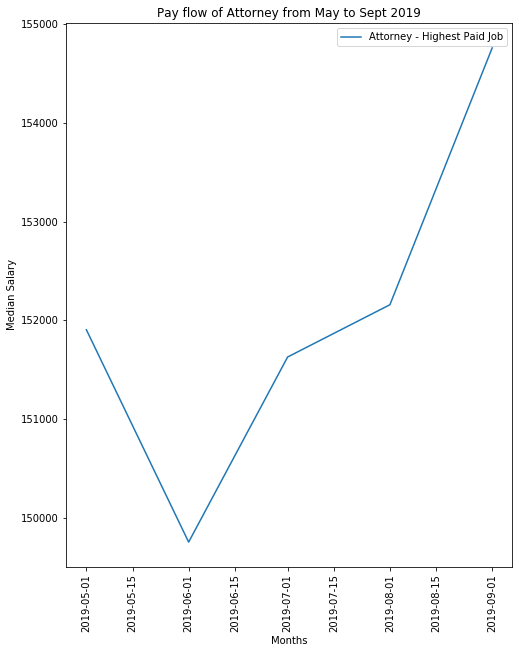

In [47]:
f, ax = plt.subplots(figsize=(8,10)) 
plt.plot(highestPaidJob['Month'],highestPaidJob['Value'], label='Attorney - Highest Paid Job')
plt.xticks(rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Median Salary')
plt.title('Pay flow of Attorney from May to Sept 2019')
ax.legend()
plt.show()

# Hypothesis 2: What is the highest paid job in each metro.

In [48]:
grpByMetro=job_title.loc[job_title.reindex().groupby(['Metro'])['Value'].idxmax()]

In [49]:
grpByMetro

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
197,Atlanta,Job Title,2019-09-01,Solutions Architect,Median Base Pay,120207,3.8%
197,Atlanta,Job Title,2019-08-01,Solutions Architect,Median Base Pay,119507,3.0%
197,Atlanta,Job Title,2019-07-01,Solutions Architect,Median Base Pay,117176,0.4%
197,Atlanta,Job Title,2019-06-01,Solutions Architect,Median Base Pay,117993,0.3%
197,Atlanta,Job Title,2019-05-01,Solutions Architect,Median Base Pay,118782,1.8%
852,Boston,Job Title,2019-09-01,Professor,Median Base Pay,123479,3.9%
852,Boston,Job Title,2019-08-01,Professor,Median Base Pay,121399,2.1%
852,Boston,Job Title,2019-07-01,Professor,Median Base Pay,120776,1.0%
852,Boston,Job Title,2019-06-01,Professor,Median Base Pay,120413,0.5%
852,Boston,Job Title,2019-05-01,Professor,Median Base Pay,119550,0.3%


# Answer for Hypothesis 2: <br>
Atlant : Solutions Architect <br>
Boston : Professor <br>
Chicago : Pharmacist<br>
Huston : Attorney<br>
Los Angeles : Pharmacist<br>
New York City : Attorney<br>
Philadelphia : Pharmacist<br>
San Francisco : Attorney<br>
Seattle : Data Scientist<br>
Washington DC : Attorney<br>

### Lets plot the average Pay of highest Paid profession of each Metro.

In [50]:
CityProfession=(grpByMetro['Metro']+' / '+grpByMetro['Dimension']).unique()

Getting the mean value for each metro and storing it to a list.

In [51]:
cities=list(grpByMetro['Metro'].unique())
meanValue=[]
for city in cities:
    meanValue.append(grpByMetro.groupby(['Metro']).get_group(city)['Value'].mean())

In [52]:
meanValue

[118733.0,
 121123.4,
 121622.4,
 121327.0,
 137000.2,
 126186.8,
 128585.0,
 119711.0,
 152042.0,
 128688.6,
 135437.2]

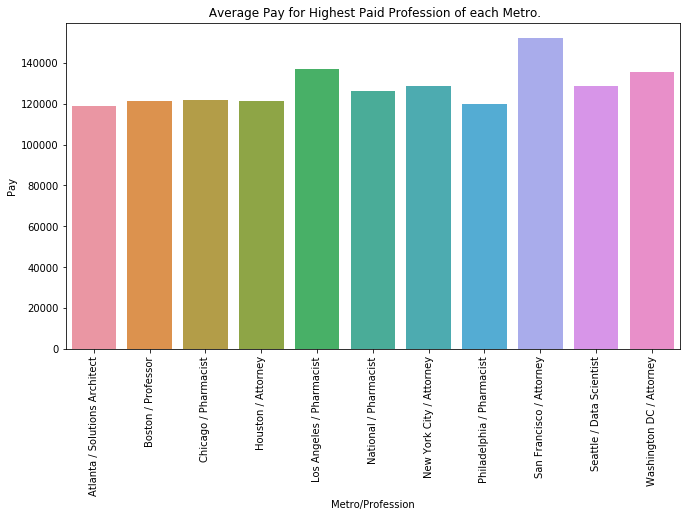

In [53]:
f, ax = plt.subplots(figsize=(11,6))
sns.barplot(x=CityProfession,y=meanValue)
plt.xlabel('Metro/Profession')
plt.ylabel('Pay')
plt.xticks(rotation='vertical')
plt.title(' Average Pay for Highest Paid Profession of each Metro.')
plt.show()

# Hypothesis 3: Which one is more, Technology Jobs or Non-Technology jobs? 

For this hyposthesis we will be using industry Data Frame

In [54]:
industry.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
1032,National,Industry,2019-09-01,Accounting & Legal,Median Base Pay,54340,NaN
1033,National,Industry,2019-09-01,Aerospace & Defense,Median Base Pay,56086,NaN
1034,National,Industry,2019-09-01,Architecture & Civil Engineering,Median Base Pay,54549,NaN
1035,National,Industry,2019-09-01,Arts & Entertainment,Median Base Pay,47965,NaN
1036,National,Industry,2019-09-01,Automotive,Median Base Pay,48455,NaN


In [55]:
industry['Dimension'].unique()

array(['Accounting & Legal', 'Aerospace & Defense',
       'Architecture & Civil Engineering', 'Arts & Entertainment',
       'Automotive', 'Banking & Financial Services', 'Beauty & Fitness',
       'Biotech & Pharmaceuticals', 'Business Services',
       'Computer Software & Hardware', 'Construction', 'Consulting',
       'Consumer Electronics', 'Consumer Services', 'Education & Schools',
       'Energy & Utilities', 'Facilities', 'Farming & Agriculture',
       'Government', 'Health Care & Hospitals', 'Information Technology',
       'Insurance', 'Internet & Tech', 'Manufacturing',
       'Marketing & Advertising', 'Media & Publishing', 'Nonprofit',
       'Private Security', 'Real Estate', 'Recruiting & Staffing',
       'Restaurants & Bars', 'Retail', 'Supermarkets',
       'Telecommunications', 'Transportation & Logistics',
       'Travel & Tourism', 'Wholesale', 'Other'], dtype=object)

#### From the above list of all the Profession, making the list of 5 profession as technical and non-technical.

In [56]:
techJobs=['Computer Software & Hardware','Biotech & Pharmaceuticals','Information Technology','Internet & Tech','Telecommunications']
NonTechJobs=['Travel & Tourism','Education & Schools','Farming & Agriculture','Real Estate','Transportation & Logistics']

In [57]:
industry['Measure'].unique()

array(['Median Base Pay', 'Job Openings'], dtype=object)

Fetching out all the entries from the industry DataFrame which has Measure as 'Job Opening' and the Dimension matches the list 'NonTechJobs' and grouping them by Month. Also excluding the Metro as 'National'

In [58]:
nonTechIndustry=(industry[(industry['Measure']=='Job Openings') & (industry['Metro'] != 'National') & (industry['Dimension'].isin(NonTechJobs))]).groupby('Month')

In [59]:
nonTechIndustry.first()

,Metro,Dimension_Type,Dimension,Measure,Value,YoY
Month,,,,,,
2019-05-01,Atlanta,Industry,Education & Schools,Job Openings,4532,0.278021
2019-06-01,Atlanta,Industry,Education & Schools,Job Openings,4160,0.140204
2019-07-01,Atlanta,Industry,Education & Schools,Job Openings,4249,0.273565
2019-08-01,Atlanta,Industry,Education & Schools,Job Openings,3563,0.096983
2019-09-01,Atlanta,Industry,Education & Schools,Job Openings,3776,0.210644


Fetching out all the entries from the industry DataFrame which has Measure as 'Job Opening' and the Dimension matches the list 'techJobs' and grouping them by Month. Also excluding the Metro as 'National'

In [60]:
techIndustry=(industry[(industry['Measure']=='Job Openings') & (industry['Metro'] != 'National') & (industry['Dimension'].isin(techJobs))]).groupby('Month')

In [61]:
techIndustry.first()

,Metro,Dimension_Type,Dimension,Measure,Value,YoY
Month,,,,,,
2019-05-01,Atlanta,Industry,Biotech & Pharmaceuticals,Job Openings,936,-0.000534
2019-06-01,Atlanta,Industry,Biotech & Pharmaceuticals,Job Openings,933,-0.078519
2019-07-01,Atlanta,Industry,Biotech & Pharmaceuticals,Job Openings,1038,0.016393
2019-08-01,Atlanta,Industry,Biotech & Pharmaceuticals,Job Openings,1157,-0.001079
2019-09-01,Atlanta,Industry,Biotech & Pharmaceuticals,Job Openings,1093,-0.018194


Now we got all numbers of Job Opening of Technology and non-Technology job, we can sum them to get the total number of job for each month.

Sum of Non-Tech Jobs

In [62]:
nonTechIndustry['Dimension','Value'].sum()

,Dimension,Value
Month,,
2019-05-01,Education & SchoolsFarming & AgricultureReal E...,177548
2019-06-01,Education & SchoolsFarming & AgricultureReal E...,159399
2019-07-01,Education & SchoolsFarming & AgricultureReal E...,158199
2019-08-01,Education & SchoolsFarming & AgricultureReal E...,161456
2019-09-01,Education & SchoolsFarming & AgricultureReal E...,160713


Sum of all Tech Jobs

In [63]:
techIndustry['Dimension','Value'].sum()

,Dimension,Value
Month,,
2019-05-01,Biotech & PharmaceuticalsComputer Software & H...,204468
2019-06-01,Biotech & PharmaceuticalsComputer Software & H...,196011
2019-07-01,Biotech & PharmaceuticalsComputer Software & H...,194649
2019-08-01,Biotech & PharmaceuticalsComputer Software & H...,205507
2019-09-01,Biotech & PharmaceuticalsComputer Software & H...,200008


Plotting the month wise non-Tech Jobs

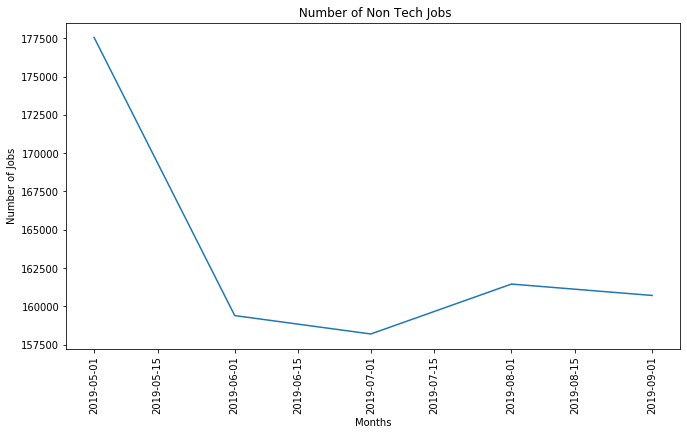

In [64]:
f, ax = plt.subplots(figsize=(11,6))
plt.plot(nonTechIndustry['Value'].sum())
plt.xlabel('Months')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='vertical')
plt.title(' Number of Non Tech Jobs')
plt.show()

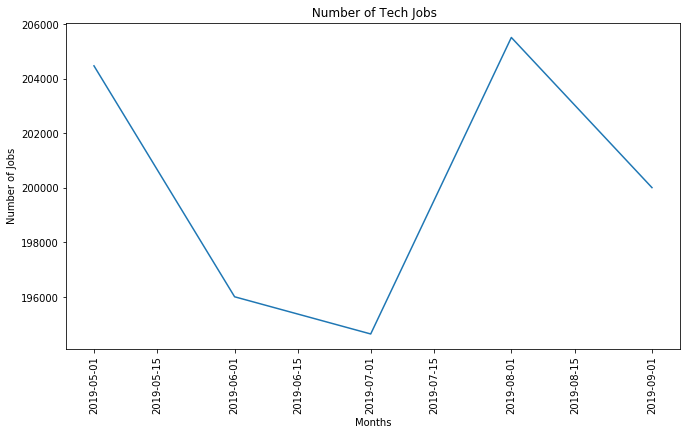

In [65]:
f, ax = plt.subplots(figsize=(11,6))
plt.plot(techIndustry['Value'].sum())
plt.xlabel('Months')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='vertical')
plt.title(' Number of Tech Jobs')
plt.show()

### Combining the plot to see the difference

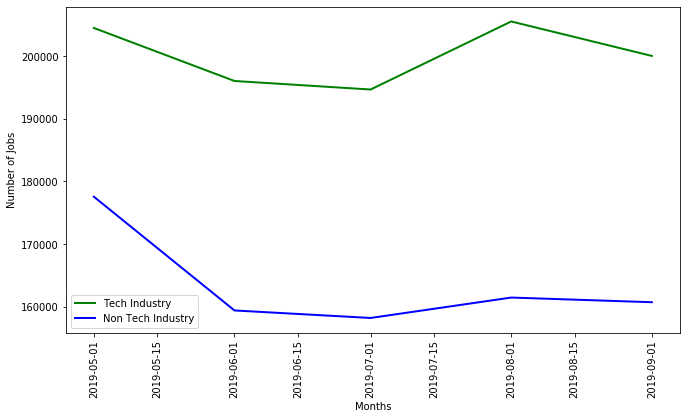

In [66]:
f, ax = plt.subplots(figsize=(11,6))
plt.plot(techIndustry['Value'].sum(), marker='', color='g', linewidth=2, label="Tech Industry")
plt.plot( nonTechIndustry['Value'].sum(), marker='', color='b', linewidth=2, label="Non Tech Industry")
plt.xlabel('Months')
plt.ylabel('Number of Jobs')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Answer to Hyposthesis 3: Tehcnology jobs are more than Non-Technology jobs

# Hyposthesis 4: Which metro gives the highest paid Data Science Job.

For this we will be using Job_title DataFrame

In [67]:
job_title.head()

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
42,National,Job Title,2019-09-01,Accountant,Median Base Pay,57616,1.3%
43,National,Job Title,2019-09-01,Administrative Assistant,Median Base Pay,41923,1.5%
44,National,Job Title,2019-09-01,Attorney,Median Base Pay,99715,0.8%
45,National,Job Title,2019-09-01,Bank Teller,Median Base Pay,32223,3.3%
46,National,Job Title,2019-09-01,Barista,Median Base Pay,25678,3.1%


In [68]:
job_title['Measure'].unique()

array(['Median Base Pay'], dtype=object)

Considering Data Scientist and Data Analyst under Data Science Job

Fetching out all Data Scientist and Data Analyst Jobs from data frame

In [69]:
dataAnalyst=job_title[(job_title['Dimension']=='Data Analyst')]
dataScientist=job_title[(job_title['Dimension']=='Data Scientist')]

For each month fecthing out maximum of value column, representing pay.

In [70]:
dataAnalyst.loc[dataAnalyst['Value'].idxmax()]

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
648,San Francisco,Job Title,2019-09-01,Data Analyst,Median Base Pay,93375,4.3%
648,San Francisco,Job Title,2019-08-01,Data Analyst,Median Base Pay,92404,4.1%
648,San Francisco,Job Title,2019-07-01,Data Analyst,Median Base Pay,92999,4.2%
648,San Francisco,Job Title,2019-06-01,Data Analyst,Median Base Pay,92983,3.4%
648,San Francisco,Job Title,2019-05-01,Data Analyst,Median Base Pay,92930,2.8%


In [71]:
dataScientist.loc[dataScientist['Value'].idxmax()]

,Metro,Dimension_Type,Month,Dimension,Measure,Value,YoY
649,San Francisco,Job Title,2019-09-01,Data Scientist,Median Base Pay,143516,1.1%
649,San Francisco,Job Title,2019-08-01,Data Scientist,Median Base Pay,143291,3.0%
649,San Francisco,Job Title,2019-07-01,Data Scientist,Median Base Pay,144533,5.2%
649,San Francisco,Job Title,2019-06-01,Data Scientist,Median Base Pay,142993,5.0%
649,San Francisco,Job Title,2019-05-01,Data Scientist,Median Base Pay,141996,3.4%


# Answer to Hypothesis 4: For Data Science jobs the San Fancisco is offering the highest pay.<br>
# For sept month: Data Analyst Median Pay was 93375 USD and for Data Scientist it was 143516 USD.

### Learning from this Project: Technically got a good knowledge of Python and Exploratory Data Analysis             And regarding this dataset I got to know about the Jobs and their trends. It will help me in my future job hunting.